In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

# Remove all the warnings
import warnings
warnings.filterwarnings('ignore')

# Set env CUDA_LAUNCH_BLOCKING=1
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Retina display
%config InlineBackend.figure_format = 'retina'

try:
    from einops import rearrange
except ImportError:
    %pip install einops
    from einops import rearrange

In [ ]:
if os.path.exists('dog_full.jpg'):
    print('dog.jpg exists')
else:
    !wget https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg -O dog_full.jpg

dog.jpg exists


In [ ]:
img = torchvision.io.read_image("dog.jpg")
img

tensor([[[ 94,  94,  93,  ...,  63,  62,  62],
         [189, 188, 188,  ..., 135, 135, 135],
         [193, 193, 192,  ..., 141, 140, 140],
         ...,
         [186, 184, 180,  ..., 153, 150, 150],
         [168, 166, 165,  ..., 134, 133, 133],
         [ 15,  14,  13,  ...,  37,  35,  35]],

        [[ 78,  78,  77,  ...,  63,  62,  62],
         [174, 173, 173,  ..., 133, 133, 133],
         [177, 177, 176,  ..., 137, 136, 136],
         ...,
         [175, 173, 169,  ...,  91,  88,  88],
         [157, 155, 154,  ...,  84,  83,  83],
         [  1,   0,   1,  ...,   0,   0,   0]],

        [[ 42,  42,  41,  ...,  27,  26,  26],
         [133, 132, 132,  ...,  95,  95,  95],
         [128, 128, 127,  ...,  99,  98,  98],
         ...,
         [111, 109, 107,  ...,  44,  41,  41],
         [112, 110, 109,  ...,  51,  50,  50],
         [  0,   0,   0,  ...,   0,   0,   0]]], dtype=torch.uint8)

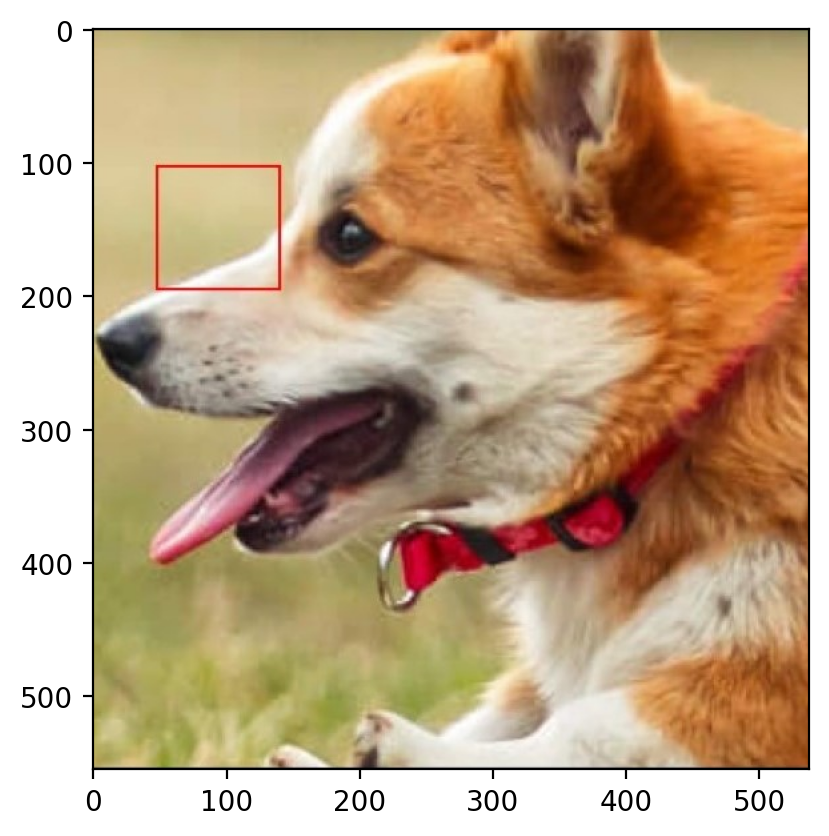

In [ ]:
plt.imshow(rearrange(img, 'c h w -> h w c').numpy())

In [ ]:
from sklearn import preprocessing

scaler_img = preprocessing.MinMaxScaler().fit(img.reshape(-1, 1))
scaler_img

MinMaxScaler()

In [ ]:
img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
img_scaled.shape

img_scaled = torch.tensor(img_scaled)

In [ ]:
img_scaled = img_scaled.to(device)
img_scaled

tensor([[[0.3686, 0.3686, 0.3647,  ..., 0.2471, 0.2431, 0.2431],
         [0.7412, 0.7373, 0.7373,  ..., 0.5294, 0.5294, 0.5294],
         [0.7569, 0.7569, 0.7529,  ..., 0.5529, 0.5490, 0.5490],
         ...,
         [0.7294, 0.7216, 0.7059,  ..., 0.6000, 0.5882, 0.5882],
         [0.6588, 0.6510, 0.6471,  ..., 0.5255, 0.5216, 0.5216],
         [0.0588, 0.0549, 0.0510,  ..., 0.1451, 0.1373, 0.1373]],

        [[0.3059, 0.3059, 0.3020,  ..., 0.2471, 0.2431, 0.2431],
         [0.6824, 0.6784, 0.6784,  ..., 0.5216, 0.5216, 0.5216],
         [0.6941, 0.6941, 0.6902,  ..., 0.5373, 0.5333, 0.5333],
         ...,
         [0.6863, 0.6784, 0.6627,  ..., 0.3569, 0.3451, 0.3451],
         [0.6157, 0.6078, 0.6039,  ..., 0.3294, 0.3255, 0.3255],
         [0.0039, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.1647, 0.1647, 0.1608,  ..., 0.1059, 0.1020, 0.1020],
         [0.5216, 0.5176, 0.5176,  ..., 0.3725, 0.3725, 0.3725],
         [0.5020, 0.5020, 0.4980,  ..., 0.3882, 0.3843, 0.

In [ ]:
crop = torchvision.transforms.functional.crop(img_scaled.cpu(), 150, 250, 50, 50)
crop.shape

torch.Size([3, 50, 50])


Testing with r = 5
Iteration 0, Loss: 115.70168883708183
Iteration 100, Loss: 28.3018097947181
Iteration 200, Loss: 2.673506634192553
Iteration 300, Loss: 1.5444528191211409
Iteration 400, Loss: 1.146863674576026
Iteration 500, Loss: 0.9366295435699663
Iteration 600, Loss: 0.8563413150137422
Iteration 700, Loss: 0.8342651930420079
Iteration 800, Loss: 0.8258581576189723
Iteration 900, Loss: 0.8144352002276646
Channel 0 - Final Loss: 0.8077745563556903
Iteration 0, Loss: 122.4593328205608
Iteration 100, Loss: 30.928239559042378
Iteration 200, Loss: 4.461151774160079
Iteration 300, Loss: 3.204677934544493
Iteration 400, Loss: 2.419143826309233
Iteration 500, Loss: 1.811948962968471
Iteration 600, Loss: 1.505567042681084
Iteration 700, Loss: 1.2545709485411658
Iteration 800, Loss: 1.0589245398273865
Iteration 900, Loss: 0.9346967795961554
Channel 1 - Final Loss: 0.8476089209365786
Iteration 0, Loss: 117.53225572971972
Iteration 100, Loss: 24.020686625098296
Iteration 200, Loss: 3.1023869

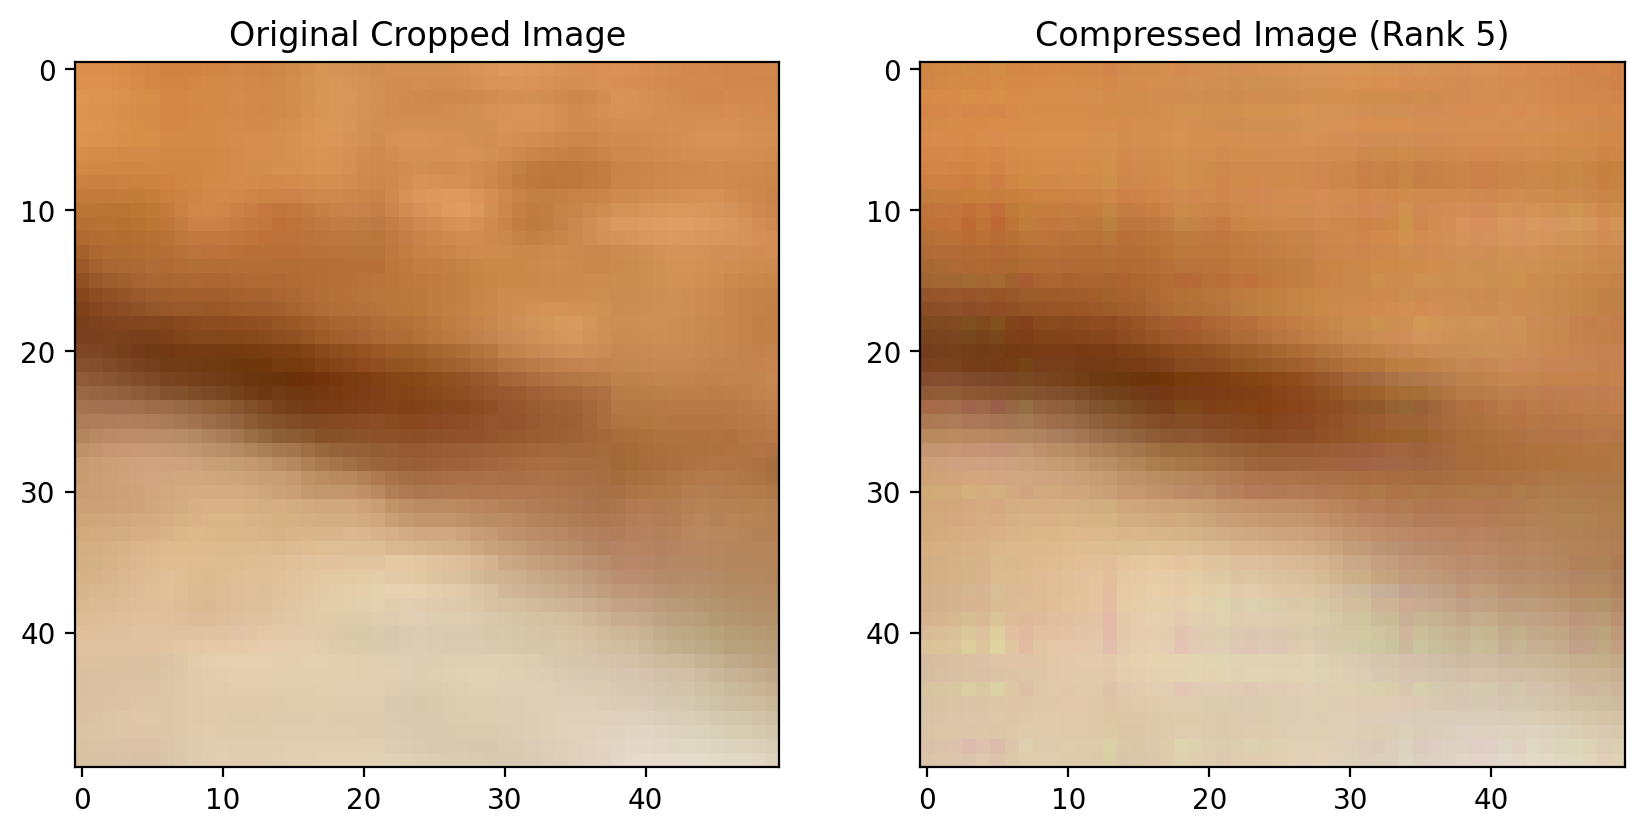


Testing with r = 10
Iteration 0, Loss: 167.1040549166687
Iteration 100, Loss: 27.65518757907123
Iteration 200, Loss: 1.696712941136636
Iteration 300, Loss: 0.8521611323304646
Iteration 400, Loss: 0.7832630285018631
Iteration 500, Loss: 0.761146860362625
Iteration 600, Loss: 0.7461179309225552
Iteration 700, Loss: 0.7283142151206723
Iteration 800, Loss: 0.7220828961746137
Iteration 900, Loss: 0.6911141122149566
Channel 0 - Final Loss: 0.6905741896995752
Iteration 0, Loss: 158.3437753672269
Iteration 100, Loss: 20.366763679323647
Iteration 200, Loss: 2.170454910465817
Iteration 300, Loss: 1.4122475159475556
Iteration 400, Loss: 1.0992807704931769
Iteration 500, Loss: 0.9323565051735575
Iteration 600, Loss: 0.8601951614889426
Iteration 700, Loss: 0.8052218846150735
Iteration 800, Loss: 0.7595619672781111
Iteration 900, Loss: 0.7021624228823371
Channel 1 - Final Loss: 0.6596672874381806
Iteration 0, Loss: 156.0453662921419
Iteration 100, Loss: 21.640361420395035
Iteration 200, Loss: 2.599

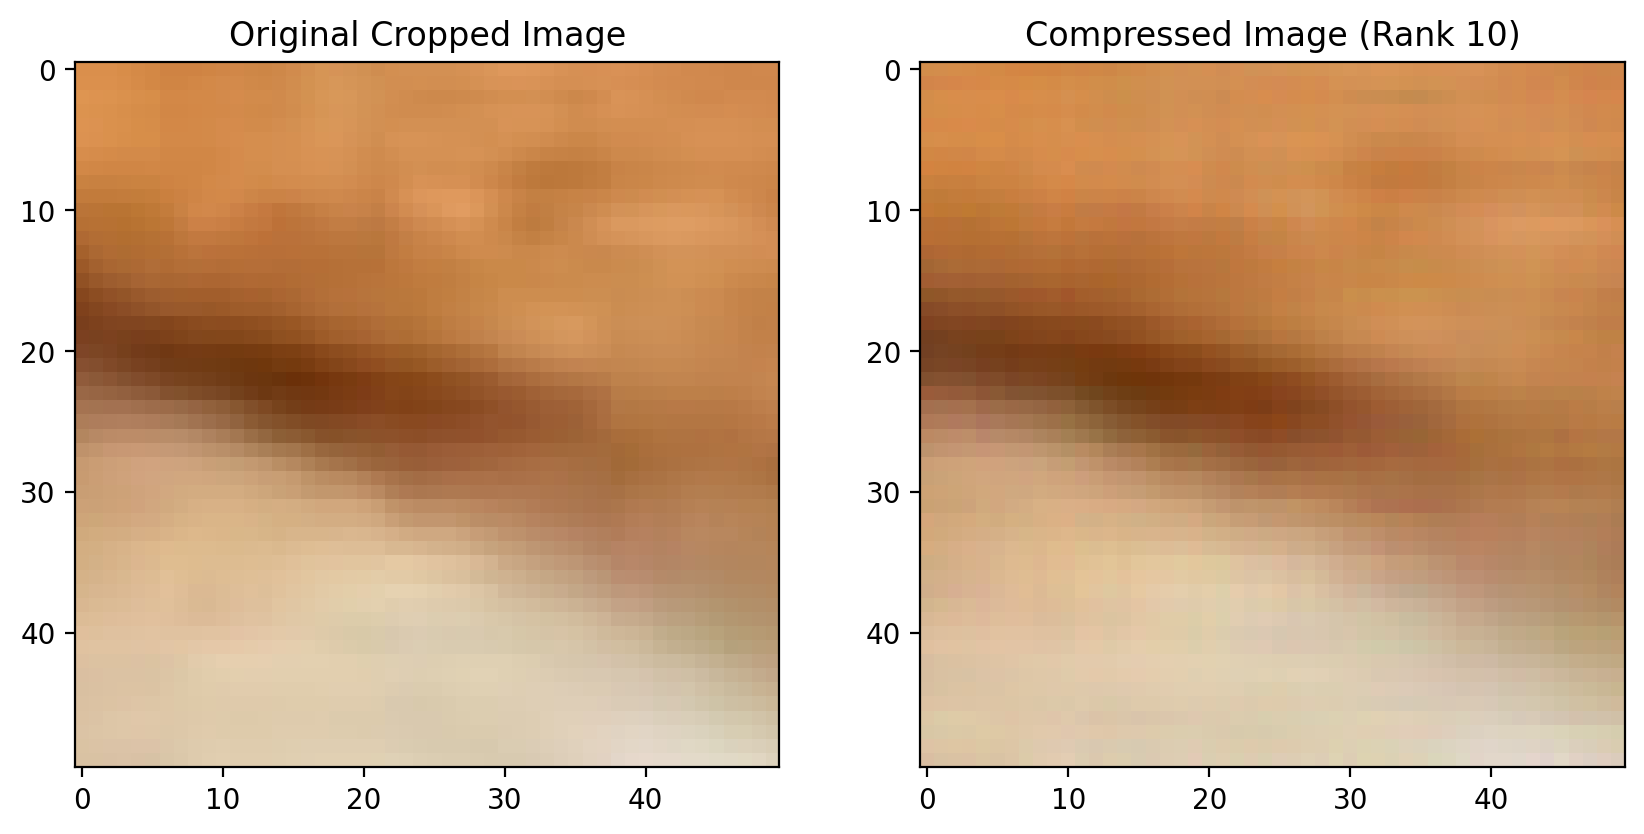


Testing with r = 25
Iteration 0, Loss: 259.1053773019294
Iteration 100, Loss: 10.302613811667788
Iteration 200, Loss: 1.0407172286408912
Iteration 300, Loss: 0.7478764272604471
Iteration 400, Loss: 0.6361123357725355
Iteration 500, Loss: 0.55940416074398
Iteration 600, Loss: 0.5147761845350597
Iteration 700, Loss: 0.48556176835371573
Iteration 800, Loss: 0.4564411712050623
Iteration 900, Loss: 0.4489315911339369
Channel 0 - Final Loss: 0.4386118624144955
Iteration 0, Loss: 246.6267006089265
Iteration 100, Loss: 9.150727885826905
Iteration 200, Loss: 1.00415308573301
Iteration 300, Loss: 0.6651768091520491
Iteration 400, Loss: 0.6083668635289079
Iteration 500, Loss: 0.5744144784494469
Iteration 600, Loss: 0.5392941195079366
Iteration 700, Loss: 0.5041475073453732
Iteration 800, Loss: 0.48854678632888054
Iteration 900, Loss: 0.4567390075690201
Channel 1 - Final Loss: 0.43870365937476496
Iteration 0, Loss: 257.0412700542061
Iteration 100, Loss: 10.610139702834696
Iteration 200, Loss: 1.2

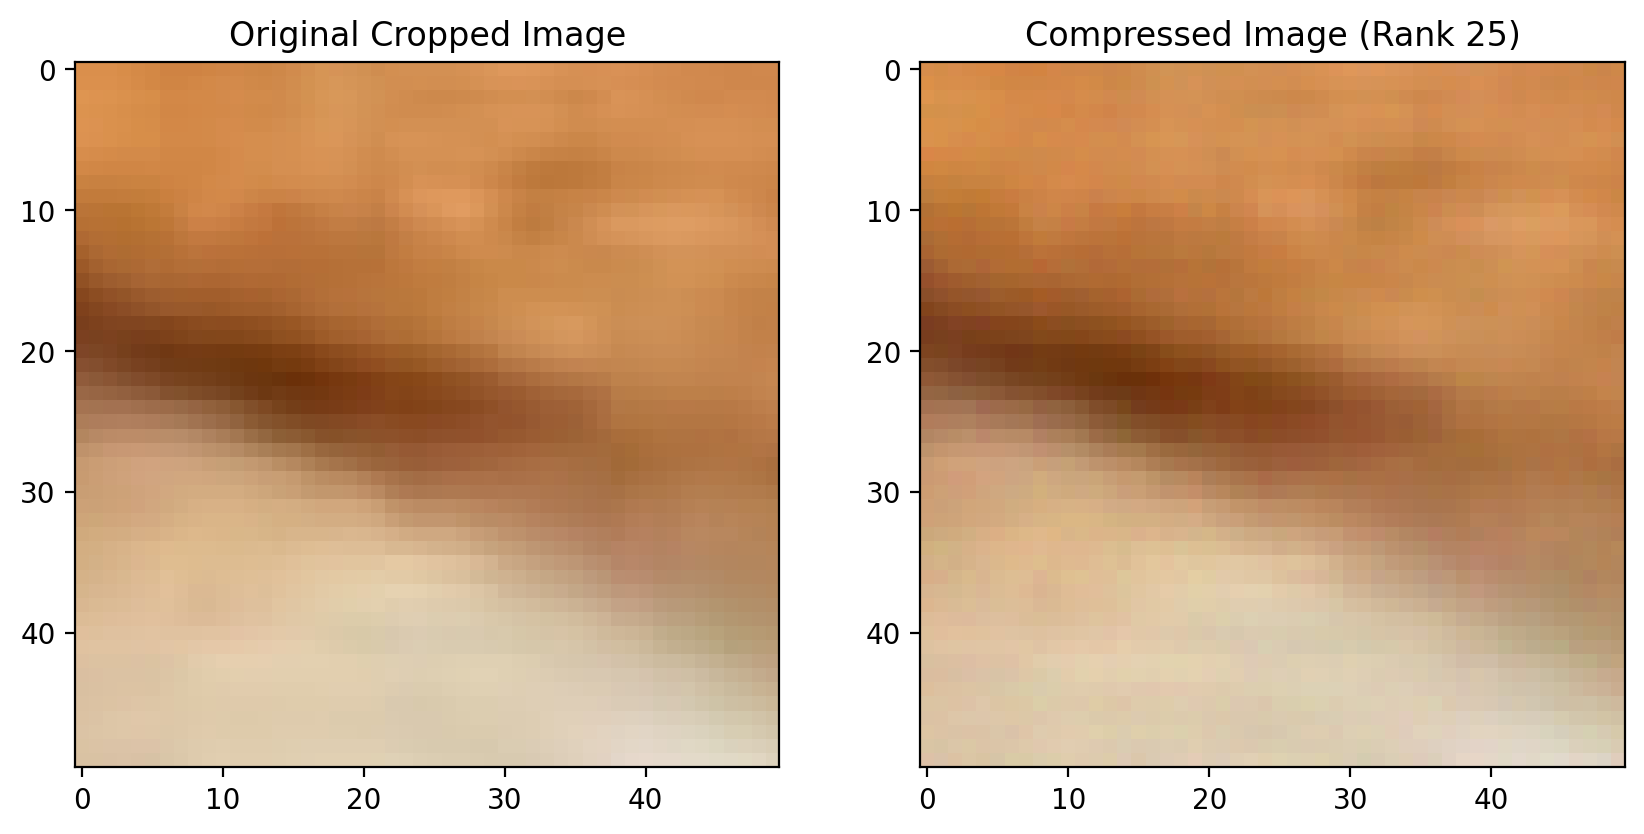


Testing with r = 50
Iteration 0, Loss: 368.58057533202737
Iteration 100, Loss: 3.1561763797476483
Iteration 200, Loss: 0.6477953070893915
Iteration 300, Loss: 0.5066888604813985
Iteration 400, Loss: 0.4629566167858435
Iteration 500, Loss: 0.45268852384518155
Iteration 600, Loss: 0.44165975684427466
Iteration 700, Loss: 0.43455879206384923
Iteration 800, Loss: 0.4252644000491813
Iteration 900, Loss: 0.42004185253314674
Channel 0 - Final Loss: 0.4120426350349122
Iteration 0, Loss: 341.0802188244695
Iteration 100, Loss: 2.988401801376403
Iteration 200, Loss: 0.6455847061877525
Iteration 300, Loss: 0.536700131976626
Iteration 400, Loss: 0.47911628785965477
Iteration 500, Loss: 0.4476078800562633
Iteration 600, Loss: 0.42764386728786474
Iteration 700, Loss: 0.4113580535891067
Iteration 800, Loss: 0.40152154528642153
Iteration 900, Loss: 0.39161103818698295
Channel 1 - Final Loss: 0.38424643301414924
Iteration 0, Loss: 346.52912826916634
Iteration 100, Loss: 2.8851519577895925
Iteration 200

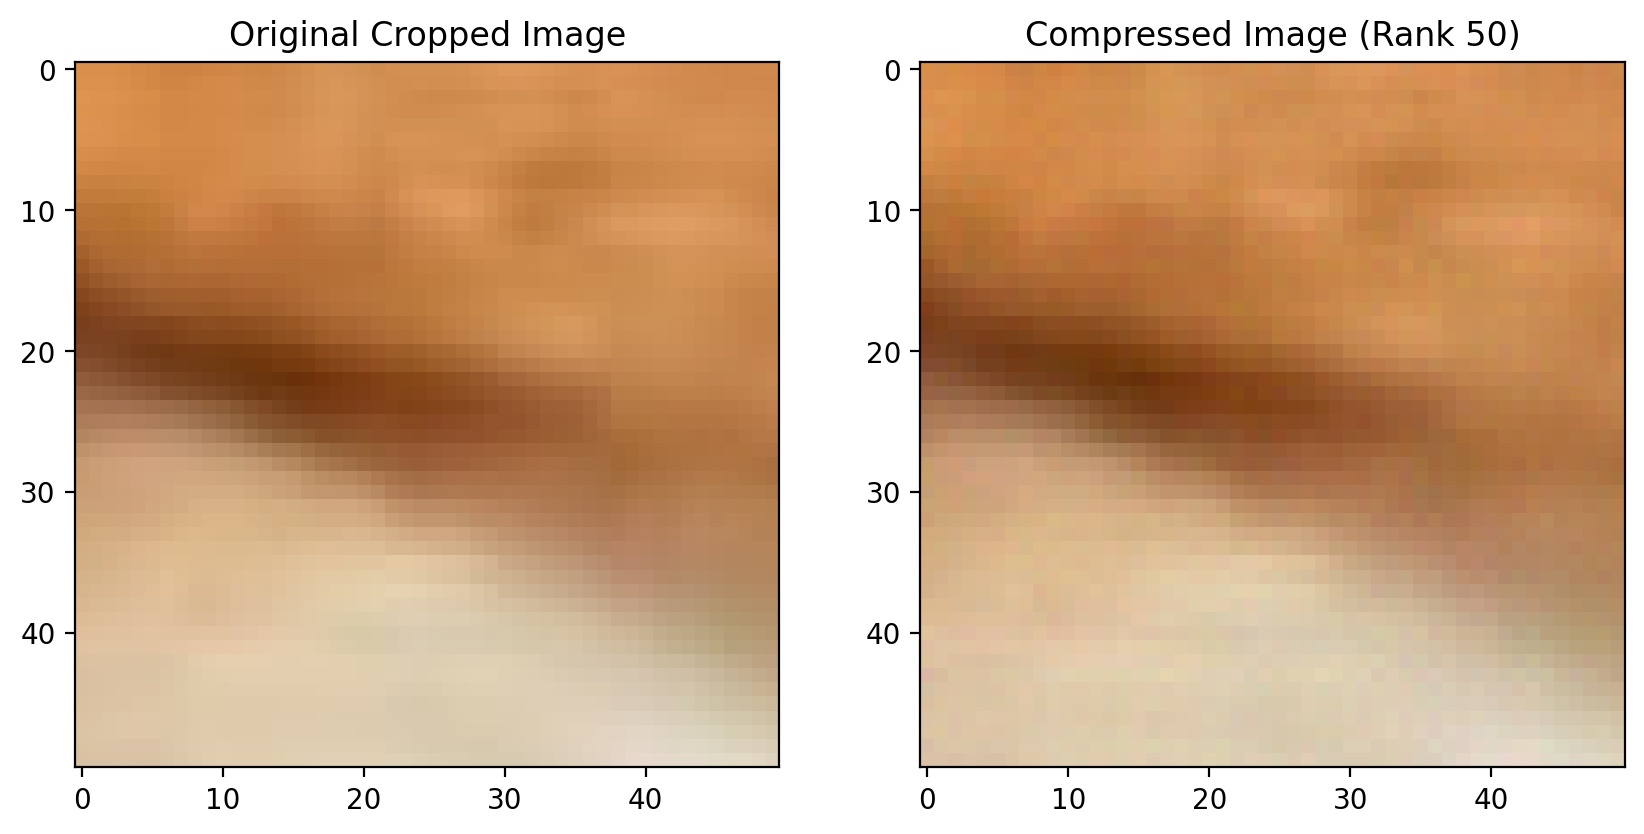

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange

# Function to compute RMSE
def compute_rmse(original, reconstructed):
    return torch.sqrt(torch.mean((original - reconstructed) ** 2)).item()

# Function to compute PSNR
def compute_psnr(original, reconstructed):
    mse = torch.mean((original - reconstructed) ** 2).item()
    if mse == 0:
        return float('inf')
    max_pixel = torch.max(original).item()
    psnr = 20 * torch.log10(max_pixel / torch.sqrt(torch.tensor(mse)))
    return psnr.item()

# Perform factorization for each channel (R, G, B)
def factorize(A, k, device=torch.device("cpu")):
    """Factorize the matrix A into W and H where A ≈ W * H"""
    A = A.to(device)

    # Randomly initialize W and H
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)

    # Optimizer
    optimizer = torch.optim.Adam([W, H], lr=0.01)

    # Train the model
    for i in range(1000):
        # Compute the difference between the original and the approximation
        diff_matrix = torch.mm(W, H) - A

        # Compute the loss as the norm of the difference
        loss = torch.norm(diff_matrix)

        # Zero the gradients
        optimizer.zero_grad()

        # Backpropagate
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss.item()}")

    return W, H, loss

# Values for r to test
r_values = [5, 10, 25, 50]

# Iterate over different values of r and display the results
for r in r_values:
    print(f"\nTesting with r = {r}")

    # Apply the factorization to all three channels (RGB)
    reconstructed_channels = []
    for channel in range(3):  # Iterate over the three channels (R, G, B)
        crop_matrix = crop[channel].view(50, 50)  # Reshape the channel to [50, 50]

        # Perform the factorization for the current channel
        W, H, loss = factorize(crop_matrix, r, device=device)
        print(f"Channel {channel} - Final Loss: {loss.item()}")

        # Reconstruct the image for the current channel
        reconstructed_matrix = torch.mm(W, H).cpu().detach()
        reconstructed_channels.append(reconstructed_matrix)

    # Stack the three channels back together into an RGB image
    reconstructed_image = torch.stack(reconstructed_channels).unsqueeze(0)  # Shape [1, 3, 50, 50]

    # Insert the compressed patch back into the original image
    reconstructed_full_image = crop.clone()  # Start with the original image crop
    reconstructed_full_image[:, :, :] = reconstructed_image  # Replace the patch with the compressed patch

    # Compute RMSE and PSNR between the original and reconstructed image
    rmse = compute_rmse(crop, reconstructed_full_image.squeeze())
    psnr = compute_psnr(crop, reconstructed_full_image.squeeze())

    # Print RMSE and PSNR for the current value of r
    print(f"RMSE: {rmse}")
    print(f"PSNR: {psnr}")

    # Plot original cropped image and compressed image for comparison
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Original cropped image
    axs[0].imshow(rearrange(crop.cpu().numpy(), 'c h w -> h w c'))
    axs[0].set_title('Original Cropped Image')

    # Compressed image
    axs[1].imshow(rearrange(reconstructed_image.squeeze().cpu().numpy(), 'c h w -> h w c'))
    axs[1].set_title(f'Compressed Image (Rank {r})')

    plt.show()